<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Maquinas de vectores de soporte

**Julio Waissman Vianova**

En esta libreta vamos a ver las diferencias entre los diferentes *kernels* así como el efecto del parámetro $C$ en la clasificación por máquinas de vectores de soporte. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('ggplot')
%matplotlib inline



### 1. Generación de las bases de datos con las que vamos a probar


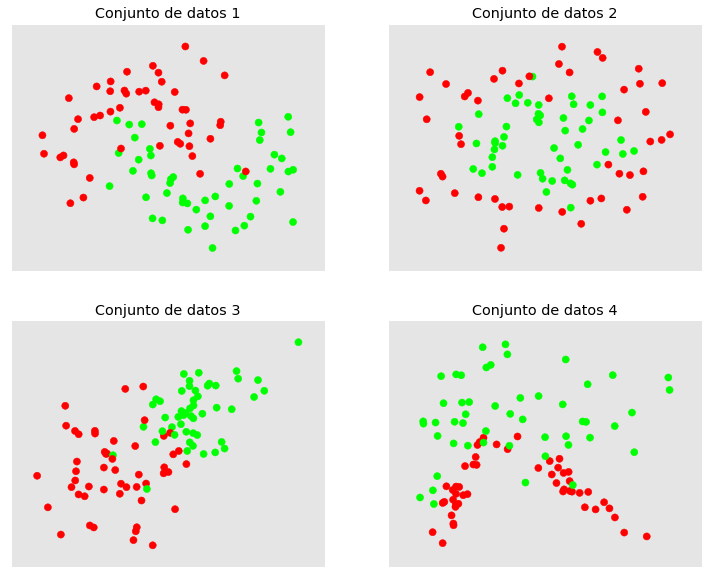

In [2]:
# Conjuntos de datos para probar
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Datos en forma de media luna
X1, y1 = datasets.make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

X4, y4 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2
)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(10, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(f"Conjunto de datos {i+1}")
figure.subplots_adjust(left=.02, right=.98)    
plt.show()



### 2. Probando diferentes kernels en los conjuntos de datos





Base de datos 1


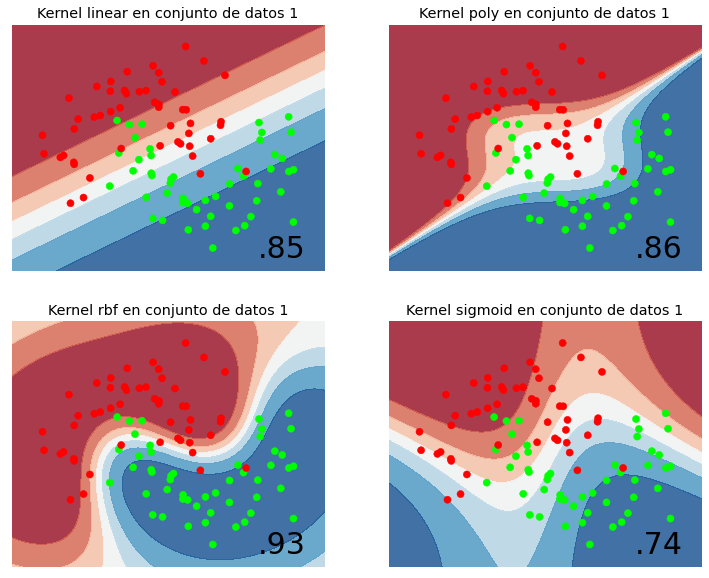



Base de datos 2


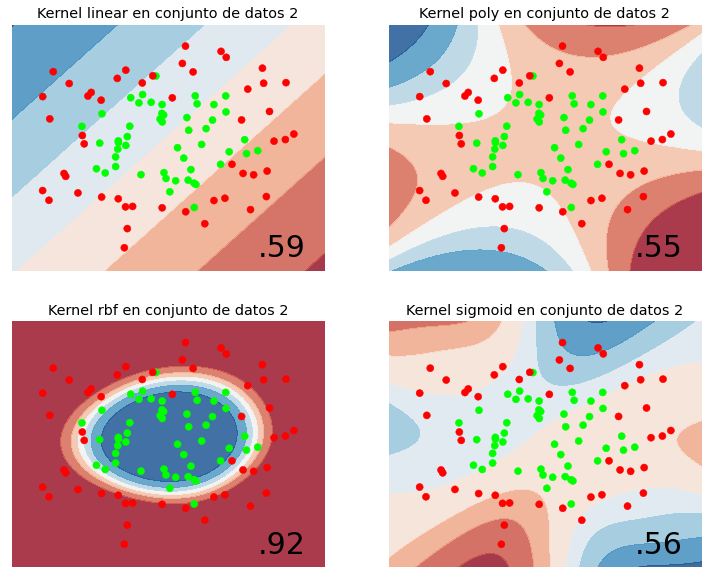



Base de datos 3


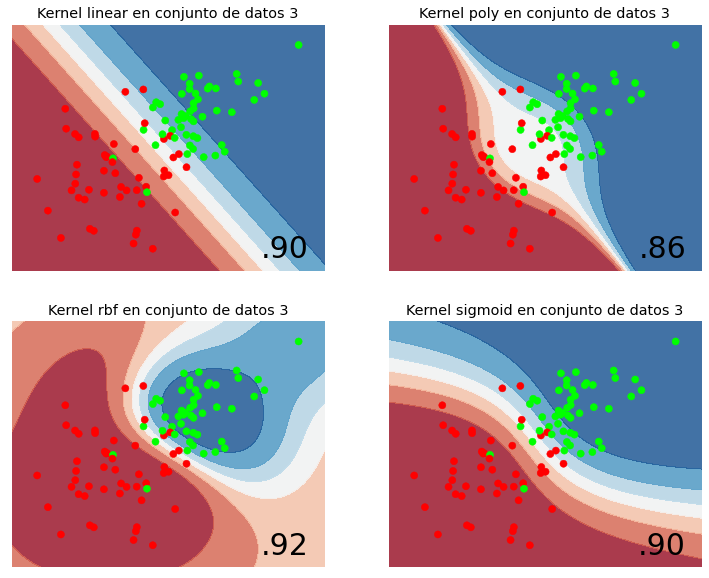



Base de datos 4


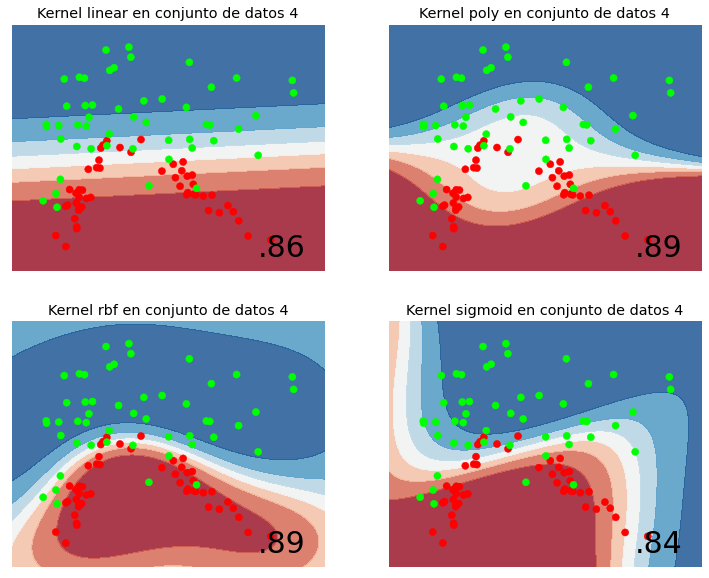

In [3]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, kernel) in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=1, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

### 3. Que pasa cuando aumenta $C$ en el clasificador lineal



Base de datos 1


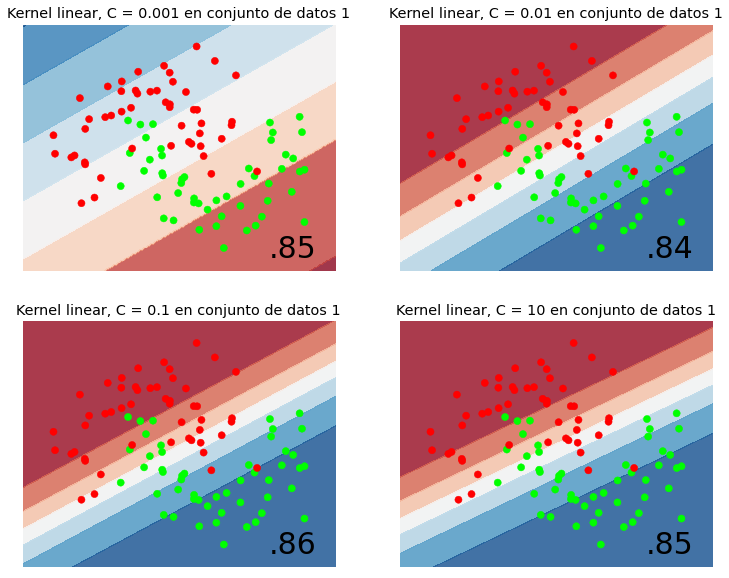



Base de datos 2


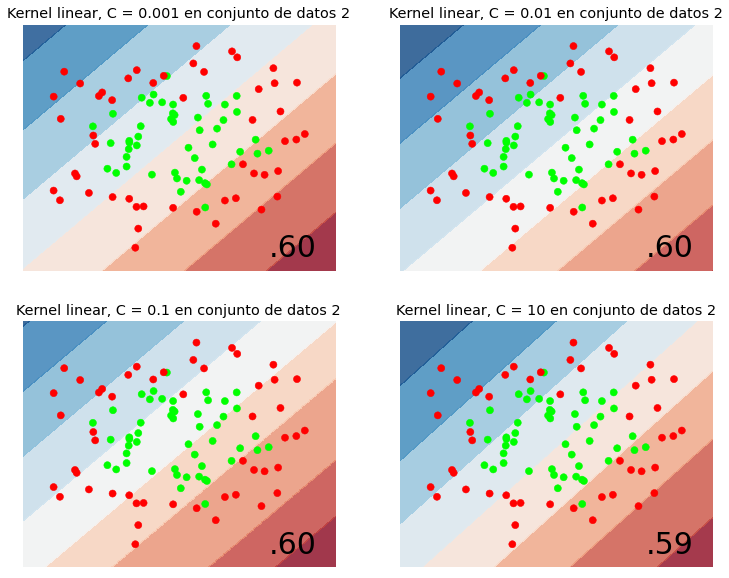



Base de datos 3


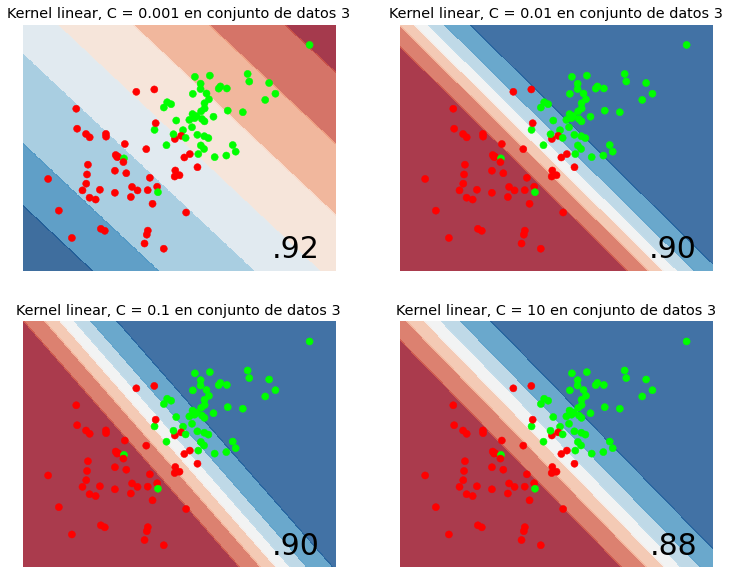



Base de datos 4


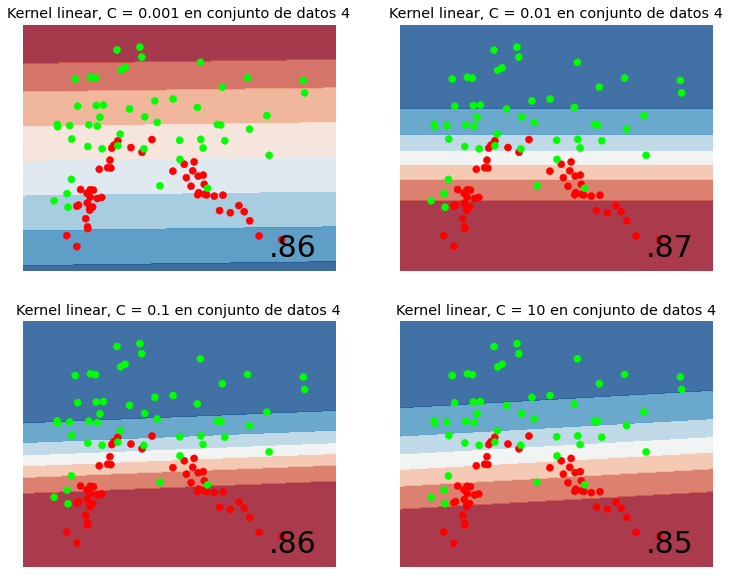

In [7]:
kernel = 'linear'

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, C) in enumerate([.001, .01, .1, 10]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel}, C = {C} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 1. Prueba modificar los valores de C para los diferentes kernels manteniendo el resto de los parámetros por default. Comenta aquí mismo tus conclusiones.**

Cuando usamos valores más pequeños de C, la división entre las dos clases es menos cerrada, lo que quiere decir que nuestro clasificador tendrá una mayor capacidad de generalización pero con el costo de que podremos cometer algunos errores de clasificación.

En cambio, cuando usamos valores mas grandes la división de las dos clases es mucho mas cerrada, lo que nos permite minimizar lo más posible la cantidad de errores de clasificación que podamos cometer pero que al mismo tiempo hace que nuestro clasificador tenga una menor capacidad de generalización y esto podría afectar negativamente al clasificar datos que no están en nuestor dataset de entrenamiento.

### 4. La variable `gamma` para los kernel `rbf`, `poly` y `sigmoid`

** Ejercicio 2. Escribe aquí mismo que significa la variable `gamma` ($\gamma$) ** para los diferentes kernels (puedes poner la ecuación si es necesario)

1. Para `rbf`: 
   <br>
   Cuando usamos el kernel rbf gamma define hasta dónde llega la influencia de un dato de nuestro dataset de entrenamiento, los valores más bajos hacen que el impacto sea mayor mientras que los valores más alto lo hacen menor. Los parámetros gamma pueden verse como la inversa del radio de influencia de las muestras seleccionadas por el modelo como vectores de apoyo. El parametro gamma representa el inverso de la varianza de nuestra función Gaussiana. (gamma siempre tiene que tener un valor mayor a 0).
   <br>
   <br>

2. Para `poly`:  
   <br>
   Según la documentación oficial de Scikit-learn para los parametros de SVM, gamma define hasta dónde llega la influencia de un dato de nuestro dataset de entrenamiento, los valores más bajos hacen que el impacto sea mayor mientras que los valores más alto lo hacen menor. (gamma siempre tiene que tener un valor mayor a 0).
   <br>
   <br>

3. Para `sigmois`:  
   <br>
   Gamma define hasta dónde llega la influencia de un dato de nuestro dataset de entrenamiento, los valores más bajos hacen que el impacto sea mayor mientras que los valores más alto lo hacen menor. (gamma siempre tiene que tener un valor mayor a 0).
   <br>
   <br>


In [11]:
def visualizaKernel(C, kernel):
    # Una figura por cada conjunto de datos
    for (cual, ds) in enumerate(datasets):

        print(f"\n\nBase de datos {cual + 1}")
        figure = plt.figure(figsize=(10, 10))

        # Escalar y selecciona valores de entrenamiento y prueba
        X, y = ds
        X = StandardScaler().fit_transform(X)

        # Meshgrid para pintar las regiones
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                             np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

        # Por cada clasificador
        for (i, gamma) in enumerate([.001, .1, 1, 10]):
            ax = plt.subplot(2, 2, i + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"{kernel}, C = {C}, $\gamma$={gamma} en conjunto de datos {cual + 1}")

        figure.subplots_adjust(left=.02, right=.98)
        plt.show()



Base de datos 1


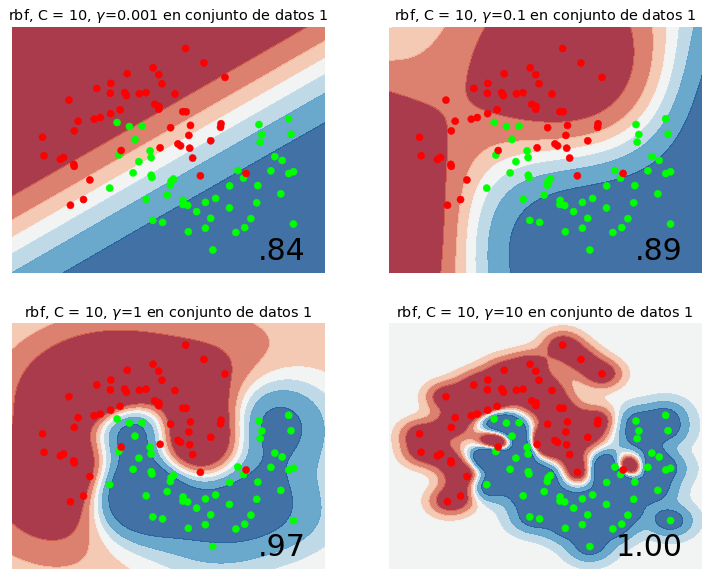



Base de datos 2


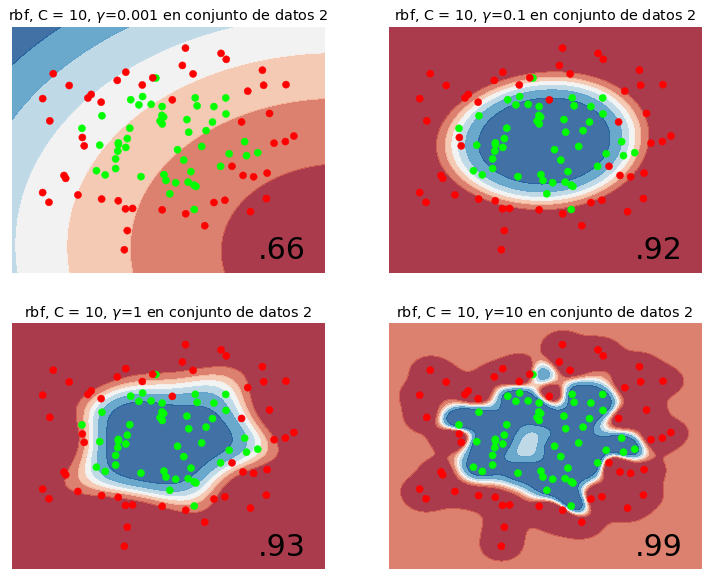



Base de datos 3


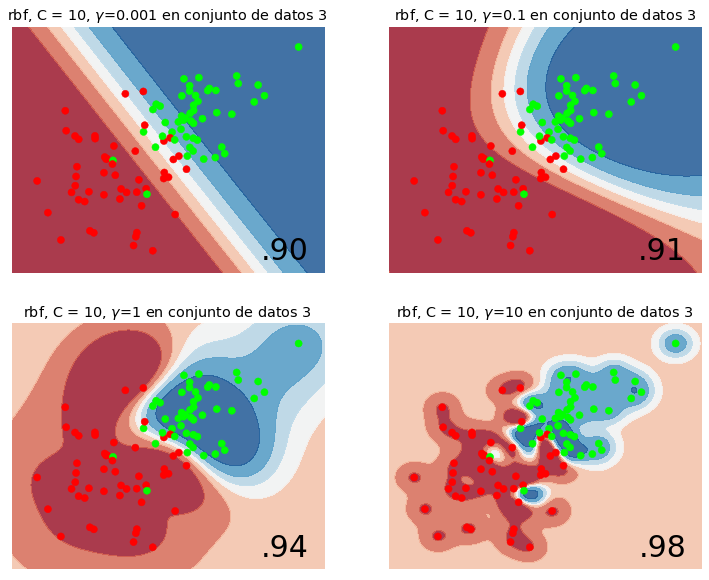



Base de datos 4


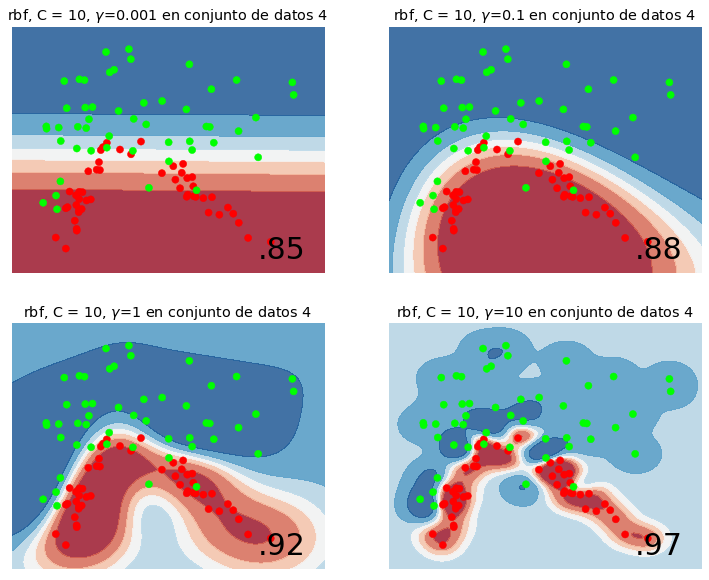



Base de datos 1


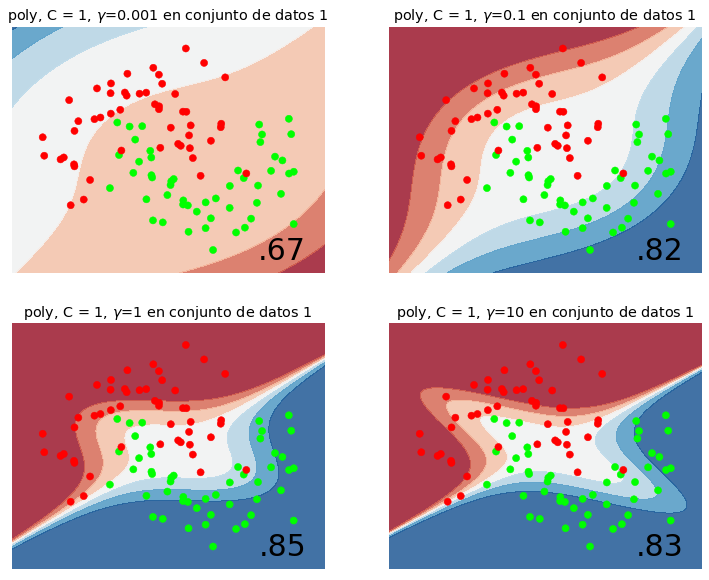



Base de datos 2


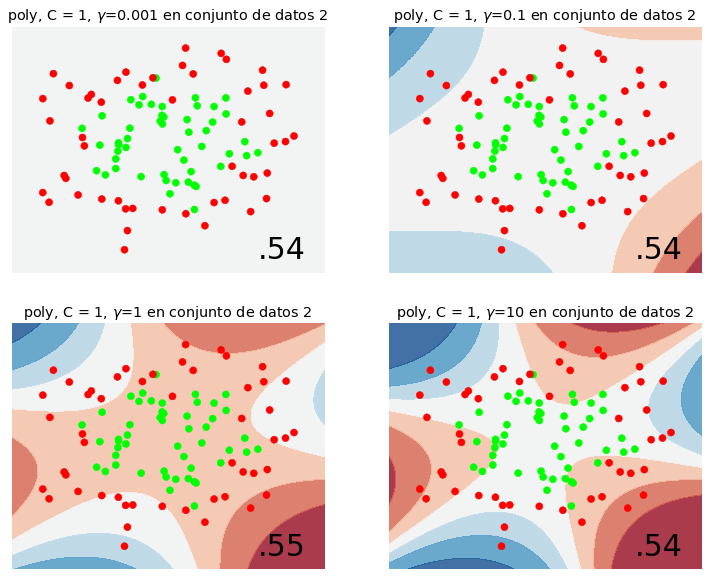



Base de datos 3


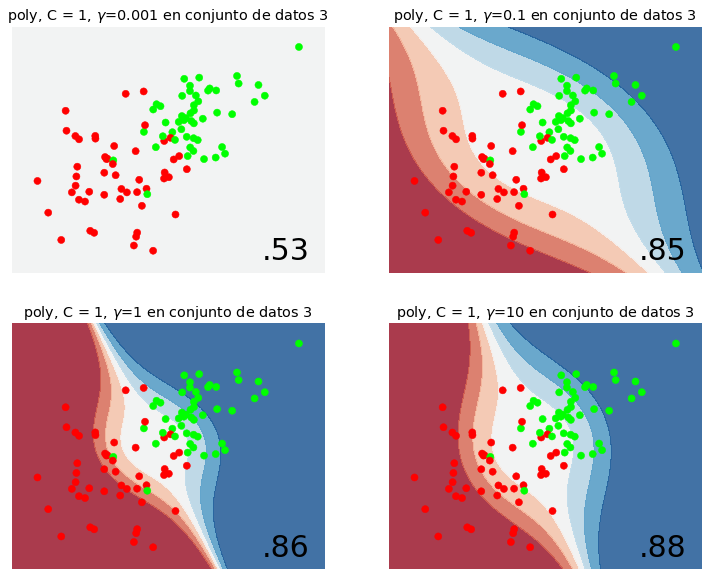



Base de datos 4


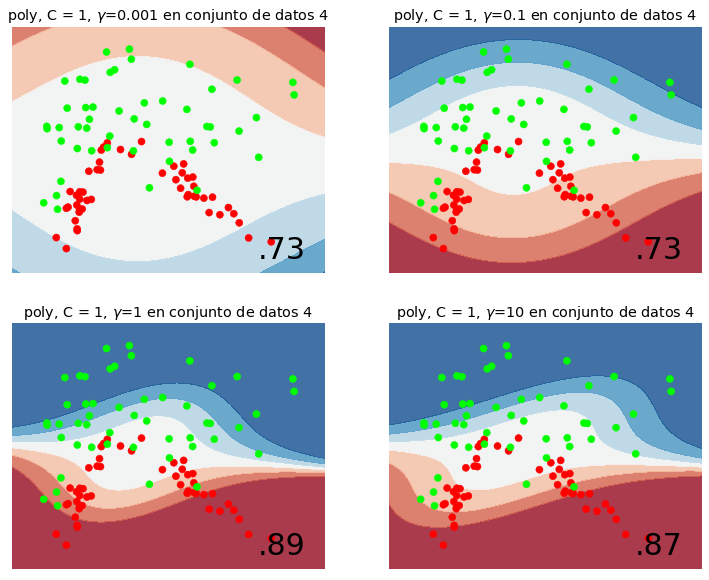



Base de datos 1


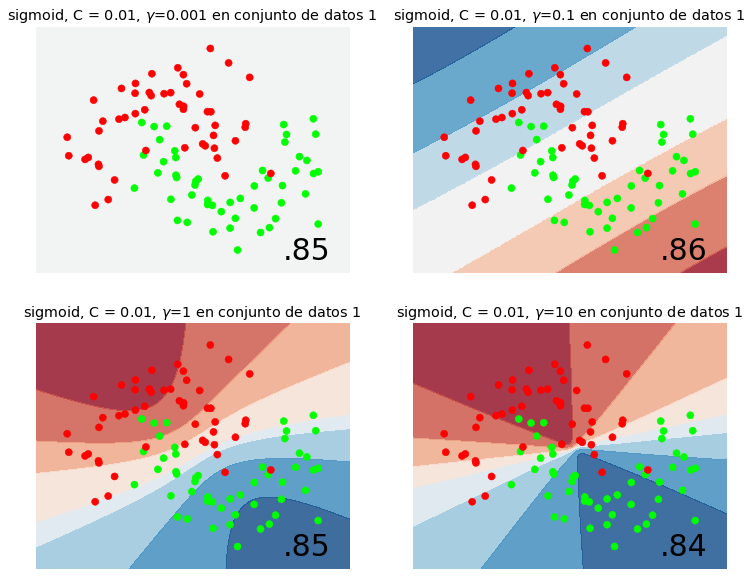



Base de datos 2


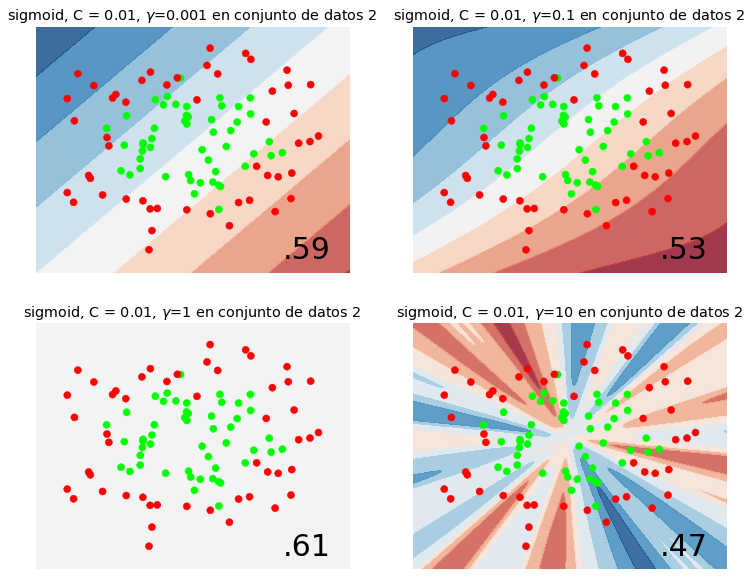



Base de datos 3


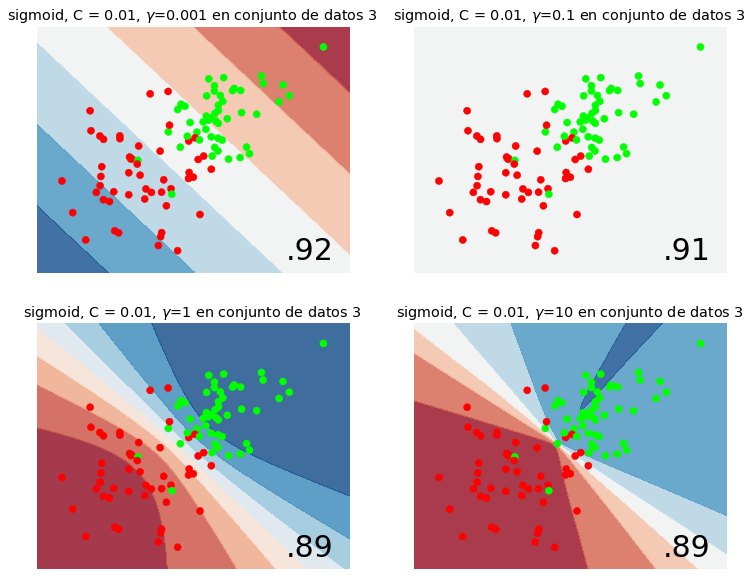



Base de datos 4


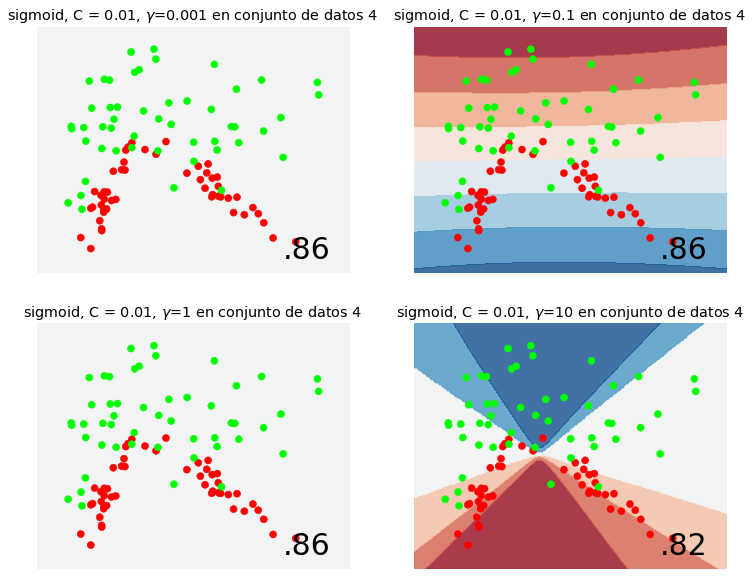

In [13]:
#Versión optimizada del código que no se repite tanto
visualizaKernel(10, 'rbf')
visualizaKernel(1, 'poly')
visualizaKernel(0.01, 'sigmoid')

**Ejercicio 3: Encuentra la mejor combiación de $C$ y $\gamma$ para los 3 tipos de *kernel*, explica en cada uno en que afecta la $\gamma$ y porque tiene una influencia tan diferente.**

- Para el **kernel rbf** **C=10 , gamma=1** fue la mejor combinación ya que dió los mejores resultados en las diferentes bases de datos, podemos ver que estos valores generaron mas errores que usar por ejemplo **gamma=10** , sin embargo si cambiaramos gamma a este valor la clasificación resultante tuviera muy poca capacidad de generalización y eso nos causaría errores de clasificación en datos futuros.

- Para el **kernel poly** **C=1 , gamma=1** fue la mejor combinación, aunque **gamma=10** dió resultados muy similares, esta combinación fue la que definió mejor la división de los datos de manera que tuviera minimos errores de clasificación pero que también tuviera capacidad de generalización.

- Para el **kernel sigmoid** **C=0.01 , gamma=1** fue la mejor combinación ya que se adaptaba de mejor manera a la forma de los datos, en este kernel los valors de C y gamma aparentan tener un impacto mucho mas grande que en los anteriores.

Cada combinación es diferente dependiendo del kernel debido a que cada kernel se rige por una ecuación diferente que utiliza los valores de C y gamma, al ser esta ecuación diferente, los valores óptimos de las variables también lo serán.

**Ejercicio 4: Como viste, existe mucho código repetido en los incisos 2, 3 y 4, por lo que se puede generalizar una parte con una función. Intenta generalizarlo**
<br>
Se transforma el código repetido en una función para no tener que reescribirlo
<br>

**Exta bono: ¿Que significa el parámetro `coef0` para los *kernels* `sigmoid` y `poly`? ¿Cómo afeca en la clasificación?

Como ya se ha mencionado antes, cada kernel tiene su propia ecuación correspondiente, en el caso de los kernels sigmoid y poly son las siguientes:

**poly** :    ($\gamma$(x, x') + r)^d
<br>
**sigmoid** : (tanh($\gamma$(x, x') + r)).

En ambos kernels: **coef0 = r**